In [573]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [574]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [575]:
target_latency = 140

In [576]:
# local_df = pd.read_csv("../measurements/local_long/map.csv")
# root_folder = "../measurements/direct_split_quantize/"
# mag_folder = "../measurements_vidvrd/test_ltl_15/"

local_df = pd.read_csv("../measurements_vidvrd/local_test/map.csv")
root_folder = "../measurements_vidvrd/direct_split_quantize/"
mag_folder = "../measurements_vidvrd/test_ltl_15/"

# local_df = pd.read_csv("../measurements_bev/local_test/map.csv")
# root_folder = "../measurements_bev/direct_split_quantize/"
# mag_folder = "../measurements_bev/test_ltl_15/"


map_df = pd.read_csv(root_folder+"map.csv")
cha_df = pd.read_csv(mag_folder+"characteristic.csv")
mag_df = pd.read_csv(mag_folder+"manager.csv")
tim_df = pd.read_csv(root_folder+"time.csv")

In [577]:
tim_df

,frame_id,head_time,serialize_time,tail_time
0,1,242.832031,68.167458,1944.066772
1,2,10.671840,3.011136,14.581824
2,3,10.552640,2.475840,12.389568
3,4,10.413312,2.173504,11.973856
4,5,10.459680,2.693024,16.027937
...,...,...,...,...
395,396,10.295936,1.906848,11.630432
396,397,10.354592,1.985184,11.752608
397,398,10.271104,1.817472,11.560096
398,399,10.232768,1.845024,11.602368


In [578]:
drops = []

for i in range(400):
    try:
        d = mag_df[mag_df["frame_id"]==i+1]["drop"].tolist()[0]
        if d >0.4:
            d=0.4
        drops.append(d)
    except:
        drops.append(drops[-1])


df = pd.DataFrame()
df["traget_drops"] = drops

In [579]:
df["map_drop"] = local_df["map"] - map_df["map"]
df["sen_drop"] = local_df["sensitivity"] - map_df["sensitivity"]

In [580]:
df["bandwidth"] = cha_df["bandwidth"]

In [581]:
tim_df["head_est"] = tim_df["head_time"]*10
tim_df["ser_est"] = tim_df["serialize_time"]*10
tim_df["tran_est"] = (target_latency - tim_df["head_est"] - tim_df["ser_est"] - tim_df["tail_time"])/1000 # last is the edge time
df["bw_com"] = map_df["datasize"]/tim_df["tran_est"]

In [582]:
df = df[200:]

In [583]:
df

,traget_drops,map_drop,sen_drop,bandwidth,bw_com
200,0.4,0.0,0.0,18000000.0,1.313057e+07
201,0.4,0.0,0.0,18000000.0,2.188030e+07
202,0.4,0.0,0.0,18000000.0,1.640976e+07
203,0.4,0.0,0.0,18000000.0,1.159726e+07
204,0.4,0.0,0.0,18000000.0,1.422340e+07
...,...,...,...,...,...
395,0.4,0.0,0.0,18000000.0,1.371360e+07
396,0.4,0.0,0.0,18000000.0,1.793292e+07
397,0.4,0.0,0.0,18000000.0,1.151262e+07
398,0.4,0.0,0.0,18000000.0,1.141356e+07


(0.0, 100000000.0)

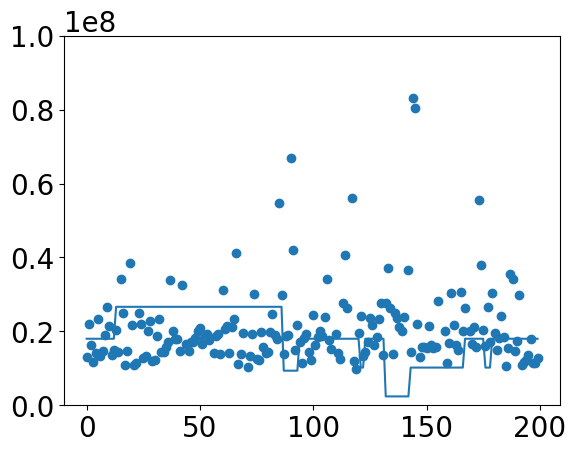

In [591]:
plt.plot(np.arange(200),df["bandwidth"])
plt.scatter(np.arange(200),df["bw_com"])
plt.ylim([0,1e8])

In [585]:
good_df = df[df["map_drop"]<df["traget_drops"]]
good_df= good_df[good_df["sen_drop"]<good_df["traget_drops"]]
good_df= good_df[good_df["bw_com"]<good_df["bandwidth"]]
# good_df= good_df[good_df["overall_time"]<target_latency]

In [586]:
good_df

,traget_drops,map_drop,sen_drop,bandwidth,bw_com
200,0.4,0.0,0.0,18000000.0,1.313057e+07
202,0.4,0.0,0.0,18000000.0,1.640976e+07
203,0.4,0.0,0.0,18000000.0,1.159726e+07
204,0.4,0.0,0.0,18000000.0,1.422340e+07
206,0.4,0.0,0.0,18000000.0,1.338582e+07
...,...,...,...,...,...
395,0.4,0.0,0.0,18000000.0,1.371360e+07
396,0.4,0.0,0.0,18000000.0,1.793292e+07
397,0.4,0.0,0.0,18000000.0,1.151262e+07
398,0.4,0.0,0.0,18000000.0,1.141356e+07


In [587]:
len(good_df)/200

0.535